# Workshop Logestic Regression with Gradient Descent

In this workshop we will build a logestic model from scratch and train it by optimising its parameters with the Gradient Descent algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from sklearn.model_selection import train_test_split

## Part 1 : Build a logestic Model
$$ y = a + bx $$<br>
$$ z = Sigmoid(y) $$<br>
$$ z = \frac{1}{1+e^{-(a+bx)}}$$

### Step 1 : generate two random correlated vectors

In [2]:
#generate a ranfom feature
np.random.seed(30)
feature = np.random.uniform(1,10,100)

#generate a target
np.random.seed(30)
target  =  np.random.uniform(1,10,100)
target  = np.where(target>5,1,0)

In [3]:
#add randomness to the target
random_shift = np.unique(np.random.randint(0,20,50))
for i in random_shift:
    if target[i] == 1 :
        target[i] = 0
    else :
        target[i] = 1

In [4]:
#check correlation
np.corrcoef(feature,target)

array([[1.        , 0.51045276],
       [0.51045276, 1.        ]])

In [5]:
X_train,X_test,y_train,y_test=train_test_split(feature,target,test_size = 0.3 , random_state=0)

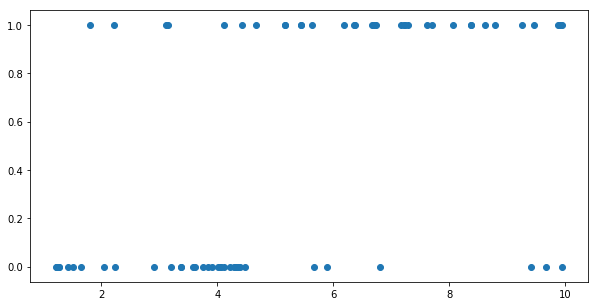

In [6]:
plt.figure(figsize=[10,5])
plt.scatter(X_train,y_train)
plt.show()

### Step 2 : prediction function  $ z = sig(a +bx) $

In [7]:
# choose random parameters : 
b = 0.1
a = 3

#liniar function : 
def liniar(a,b,x):
    y = a + b*x
    return y

#sigmoid function :
def sigmoid(a,b,x):
    y=liniar(a,b,x)
    z = 1/(1+np.exp(-y))
    return z

In [8]:
y = liniar(a,b,X_train)
x = np.linspace(-5,5,100)
z = (1/(1+np.exp(-x)))

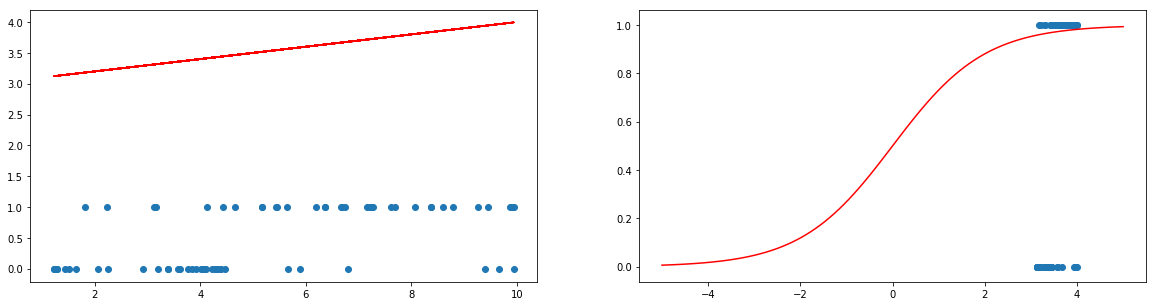

In [9]:
fig,axs = plt.subplots(1,2,figsize=(20,5))

axs[0].scatter(X_train,y_train)
axs[0].plot(X_train,y,'red')

axs[1].scatter(y,y_train)
axs[1].plot(x,z,'red')

The training part consist of optimizing the loss of our model. In order to do this, we need first to implement a loss function then try to optimise it 

## Part 2 :
## Implement a loss function : Logloss 
$$ logloss = -\sum \limits_{i=1}^{n}y\log\hat{y} + (1-y)\log(1-\hat{y}) $$

### Step 1 : logloss Implementation

In [10]:
def logloss(y_hat,y):
    return (y*np.log(y_hat)+(1-y)*np.log(1-y_hat))

def cost(a,b,x,y_true):
    y_pred = sigmoid(a,b,x)
    loss = -np.sum(logloss(y_pred,y_true))
    return loss

In [11]:
loss = cost(a,b,X_train,y_train)
loss

124.17236264111102

### Step 2 : Loss function (SSE) Visualization

In this part we will only focus on optimising the Intercept parameter and see how the value of our loss function changes when we move our intercept value from -4 to 4 with a step equal to 1 at each iteration.

In [12]:
interceptVect = []
for b in range(-4,4,1):
    interceptVect.append(cost(a,b,X_train,y_train))

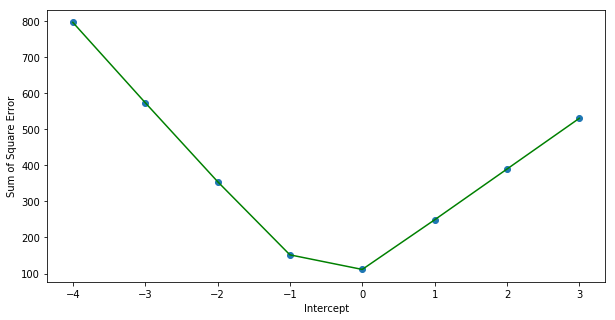

In [13]:
plt.figure(figsize=[10,5])
plt.scatter(np.arange(-4,4,1),interceptVect)
plt.plot(np.arange(-4,4,1),interceptVect,'green')
plt.xlabel('Intercept')
plt.ylabel('Sum of Square Error')
plt.show()

## Part 3 : Liniar Model evaluation before any optimisation

In [15]:
y_pred = sigmoid(a,b,X_test)
y_pred

array([1.        , 0.99996853, 1.        , 1.        , 1.        ,
       1.        , 0.99998745, 0.99994869, 1.        , 1.        ,
       1.        , 0.99936905, 0.99999993, 1.        , 0.99999566,
       1.        , 1.        , 1.        , 0.99999999, 1.        ,
       0.99999818, 0.99999948, 0.99997013, 1.        , 1.        ,
       0.99996975, 1.        , 0.99998666, 1.        , 0.99999759])

In [16]:
y_predH = np.where(y_pred>0.5,1,0)
y_predH

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [17]:
result = pd.DataFrame({'test set':X_test,'ground truth':y_test,'predictions':y_predH})
result.head(10)

,test set,ground truth,predictions
0,6.000513,1,1
1,2.455464,0,1
2,6.967431,0,1
3,5.442055,1,1
4,9.452402,1,1
5,9.416659,1,1
6,2.761941,0,1
7,2.292509,0,1
8,8.267092,1,1
9,5.784751,1,1


In [18]:
from sklearn.metrics import accuracy_score

print('accuracy : ',accuracy_score(y_test,y_predH))

accuracy :  0.5333333333333333


## Part 4 : Gradient Descent Implementation
$$ logloss = -\sum \limits_{i=1}^{n}y\log\hat{y} + (1-y)\log(1-\hat{y}), with$$
$$\hat{y} = \frac{1}{1+e^{-(a + bx)}}, \text{after applying chain rule we get :}$$<br>
$$ \frac{\partial{logloss}}{\partial{a}} =  -\sum\limits_{i=1}^{n}{\hat{y}-y},and $$ 
$$ \frac{\partial{logloss}}{\partial{b}} =   -\sum\limits_{i=1}^{n}x({\hat{y}-y}) $$ <br>
link for partial derivatives details  : https://medium.com/analytics-vidhya/derivative-of-log-loss-function-for-logistic-regression-9b832f025c2d

### Step 1 :
### Optimising the intercept parameter (a)

In [19]:
epoch = 500
learningRate = 0.001
gradientStop = 0.005
#intilize weights
a = 3
b= 0.1

In [20]:
loss = cost(a,b,X_train,y_train)    
f = np.linspace(-4,4,100)
c = (1/(1+np.exp(-f)))
for i in range(epoch):
    #show training
    clear_output(wait=True)
    fig,axs = plt.subplots(1,2,figsize=(20,5))
    y = liniar(a,b,X_train)
    axs[0].scatter(X_train,y_train)
    axs[0].plot(X_train,y,'red')
    axs[1].scatter(y,y_train)
    axs[1].plot(f,c,'red')
    plt.show()
    #-------------------------------------
    #optimization algorithm 
    #calculate loss
    loss = cost(a,b,X_train,y_train)    
    print('Before training ---> logloss : ',loss,'  epoch : ',i,' intercept : ',a)
    
    #intercept derivative
    y_hat = sigmoid(a,b,X_train)
    interceptDv = np.sum(y_hat-y_train)

    #intercept update
    a = a-learningRate*interceptDv
    
    #break if the algorithm converge
    if(np.abs(learningRate*interceptDv)<gradientStop):
        break;

KeyboardInterrupt: 

optimizing one parameter does not lead to an optimal solution, that's why we need to update all the model's parameters simultaneously when we apply any optimization algorithm.

### Step 2 : 
### Full Gradient Decent implementation : optimization of both intercept(a) and slope(b)

In [129]:
epoch = 500
learningRate = 0.001
gradientStop = 0.003
#intilize weights
a = 3
b= 0.1

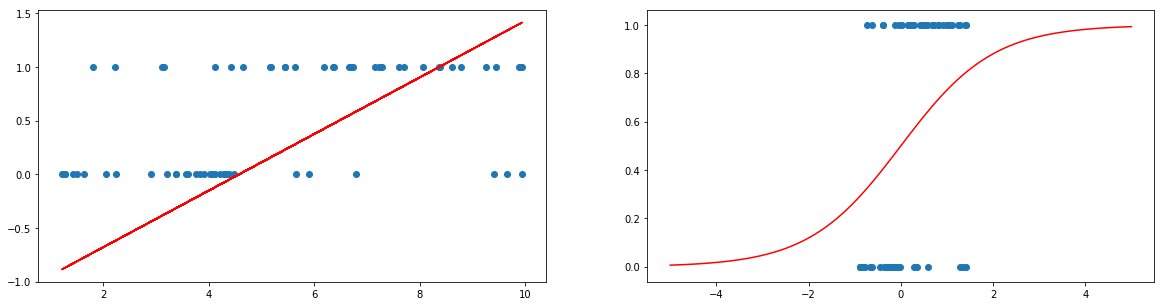

Before training ---> logloss :  40.363800827538405   epoch :  499  intercept :  -1.2080345025101122  slope :  0.2638316879969434


In [130]:
f = np.linspace(-5,5,100)
c = (1/(1+np.exp(-f)))
for i in range(epoch):  
    #show training
    clear_output(wait=True)
    fig,axs = plt.subplots(1,2,figsize=(20,5))
    y = liniar(a,b,X_train)
    axs[0].scatter(X_train,y_train)
    axs[0].plot(X_train,y,'red')
    axs[1].scatter(y,y_train)
    axs[1].plot(f,c,'red')
    plt.show()
    #-------------------------------------
    #optimization algorithm 
    #calculate loss
    loss = cost(a,b,X_train,y_train)    
    print('Before training ---> logloss : ',loss,'  epoch : ',i,' intercept : ',a,' slope : ',b)
    

    #intercept derivative
    y_hat = sigmoid(a,b,X_train)
    interceptDv = np.sum(y_hat-y_train)
    slopeDv = np.sum(X_train*(y_hat-y_train))
    
    #weights update
    a = a-learningRate*interceptDv
    b = b-learningRate*slopeDv
    
    #break if the algorithm converge
    if(np.abs(learningRate*interceptDv)<gradientStop) and (np.abs(learningRate*slopeDv)<gradientStop):
        break;

## Prediction :

In [138]:
y_pred = sigmoid(a,b,X_test)
y_pred

array([0.59266855, 0.36300847, 0.65264106, 0.55659329, 0.78376   ,
       0.78215401, 0.38194631, 0.35310541, 0.72597756, 0.57882677,
       0.72923884, 0.30435888, 0.49386312, 0.70634444, 0.40424556,
       0.73869172, 0.66615952, 0.76861699, 0.54411995, 0.60982878,
       0.42284705, 0.44984666, 0.36407251, 0.62795927, 0.60266818,
       0.36381369, 0.80421874, 0.38067826, 0.60817473, 0.41678697])

In [139]:
y_predH = np.where(y_pred>0.5,1,0)
y_predH

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0])

In [140]:
result = pd.DataFrame({'test set':X_test,'ground truth':y_test,'predictions':y_predH})
result.head(10)

,test set,ground truth,predictions
0,6.000513,1,1
1,2.455464,0,0
2,6.967431,0,1
3,5.442055,1,1
4,9.452402,1,1
5,9.416659,1,1
6,2.761941,0,0
7,2.292509,0,0
8,8.267092,1,1
9,5.784751,1,1


In [141]:
print('accuracy : {:.4}'.format(accuracy_score(y_test,y_predH)))

accuracy : 0.8


In [150]:
print('model parameters : intercept=',a,' slope=',b)

model parameters : intercept= -1.2115738241787948  slope= 0.2644077038546563


## Logestic regression using Sklearn library :

In [156]:
from sklearn.linear_model import LogisticRegression

#intilize logestic regression
logreg = LogisticRegression(solver='newton-cg')

#train the model
logreg.fit(X_train.reshape(-1,1),y_train)

#prediction
y_pred = logreg.predict(X_test.reshape(-1,1))

#evaluation
print('accuracy : {:.4}'.format(accuracy_score(y_test,y_pred)))

accuracy : 0.7667


In [157]:
result = pd.DataFrame({'test set':X_test,'ground truth':y_test,'predictions':y_predH})
result.head(10)

,test set,ground truth,predictions
0,6.000513,1,1
1,2.455464,0,0
2,6.967431,0,1
3,5.442055,1,1
4,9.452402,1,1
5,9.416659,1,1
6,2.761941,0,0
7,2.292509,0,0
8,8.267092,1,1
9,5.784751,1,1
